In [5]:
import pandas as pd

df = pd.read_csv('DataSets\\Minimum Wage Data.csv', encoding="latin")
df.to_csv("DataSets\\Minimum Wage Data.csv", encoding="utf-8")


In [56]:
df.head()

,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88


In [17]:
# Grouping the dataframe by different State, In this case its ALabama
# We can also iterate over it as well.

grp_by = df.groupby("State")
grp_by.get_group("Alabama").head()
# grp_by.get_group("Alabama").set_index("Year").head()  Setting the index as Year



,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,1968,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
55,1969,Alabama,...,NaN,0.0,0.0,36.683333,0.0,0.0
110,1970,Alabama,...,NaN,0.0,0.0,38.825000,0.0,0.0
165,1971,Alabama,...,NaN,0.0,0.0,40.491667,0.0,0.0
220,1972,Alabama,...,NaN,0.0,0.0,41.816667,0.0,0.0


In [27]:
# For every state, we iterate and show the data till 2018 using Group by

act_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name})
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name}))
    

act_min_wage.describe()
#act_min_wage
#act_min_wage.shape


,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.0,50.000000,39.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.0,9.583800,2.316200,6.781600,8.632800,6.389800,8.823600,7.498800,8.343200,7.773200,...,0.0,5.541200,6.643590,6.836600,8.657400,5.897400,8.301800,7.166400,7.694200,5.149200
std,0.0,1.845176,3.474504,1.341223,1.187508,1.521052,1.023613,1.265436,1.476133,0.887354,...,0.0,2.202229,1.590176,0.819367,0.984647,2.726151,1.868613,0.793673,0.762675,1.998928
min,0.0,7.380000,0.000000,1.070000,6.420000,3.840000,6.820000,4.410000,5.510000,6.220000,...,0.0,0.000000,4.390000,4.790000,6.800000,0.000000,4.410000,5.580000,6.420000,2.260000
25%,0.0,8.252500,0.000000,6.522500,7.695000,5.072500,7.865000,7.015000,7.097500,7.172500,...,0.0,4.762500,5.105000,6.317500,7.800000,5.892500,7.227500,6.630000,7.107500,3.270000
50%,0.0,8.890000,0.000000,6.920000,8.670000,6.375000,9.075000,7.845000,8.510000,7.655000,...,0.0,6.070000,6.770000,6.930000,8.885000,6.855000,9.055000,7.075000,7.580000,5.445000
75%,0.0,10.492500,3.147500,7.290000,9.307500,7.677500,9.455000,8.327500,9.140000,8.242500,...,0.0,7.105000,7.830000,7.470000,9.372500,7.620000,9.672500,7.612500,8.145000,6.607500
max,0.0,15.120000,10.220000,8.680000,11.880000,9.500000,11.080000,9.580000,12.000000,10.010000,...,0.0,8.380000,10.010000,8.330000,10.320000,8.800000,11.520000,9.130000,9.660000,8.980000


In [34]:
df['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Federal (FLSA)', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'U.S. Virgin Islands',
       'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [35]:
act_min_wage.corr().head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,NaN,1.000000,0.018638,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,...,NaN,-0.522472,0.277016,-0.020462,0.663558,-0.601640,0.411593,0.044814,0.702570,0.727932
Arizona,NaN,0.018638,1.000000,0.089395,0.498994,0.742527,0.458163,0.429836,0.590848,-0.049914,...,NaN,0.369900,-0.758607,0.439344,0.517960,0.047405,0.587975,0.584596,0.131588,0.346528
Arkansas,NaN,-0.377934,0.089395,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,...,NaN,0.503242,-0.204485,0.194680,0.087429,0.582192,-0.072343,0.420819,0.000470,-0.250592
California,NaN,0.717653,0.498994,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,...,NaN,-0.239533,-0.417782,0.392898,0.877922,-0.326364,0.754085,0.371765,0.584067,0.722617


In [44]:
import numpy as np


act_min_wage.replace(0,np.NaN).dropna(axis=1).corr().head(10)

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,...,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,...,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,...,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,...,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,...,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971
Delaware,0.258997,0.016125,0.479197,0.566304,0.552613,1.000000,0.796457,-0.009271,0.179312,0.466178,...,0.038750,0.427616,0.772410,0.318865,0.501815,0.487378,0.830850,0.436045,0.071042,0.502713
District of Columbia,0.321785,0.266889,0.596865,0.673371,0.652488,0.796457,1.000000,0.151129,0.335275,0.603762,...,0.159928,0.513618,0.820135,0.525490,0.537581,0.718686,0.798094,0.644477,0.267017,0.438793
Federal (FLSA),0.637679,0.117245,0.371966,-0.232035,0.487750,-0.009271,0.151129,1.000000,0.881708,0.472021,...,0.942402,0.011784,0.266963,0.098267,0.221539,0.504419,0.075067,0.272645,0.870658,0.328639
Guam,0.787915,0.039593,0.492052,-0.192616,0.632073,0.179312,0.335275,0.881708,1.000000,0.590844,...,0.814443,-0.002810,0.472814,-0.022460,0.098186,0.557049,0.223620,0.147441,0.738986,0.542694
Hawaii,0.672620,0.204801,0.519241,0.069800,0.621503,0.466178,0.603762,0.472021,0.590844,1.000000,...,0.517041,0.097491,0.741192,0.197210,0.099742,0.692043,0.500421,0.408709,0.599138,0.599665


In [48]:
min_wage_corr = act_min_wage.replace(0,np.NaN).dropna(axis=1).corr()
min_wage_corr.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,...,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,...,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,...,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,...,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,...,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971


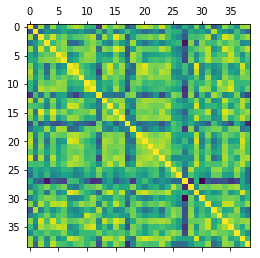

In [52]:
import matplotlib.pyplot as plt

plt.matshow(min_wage_corr)

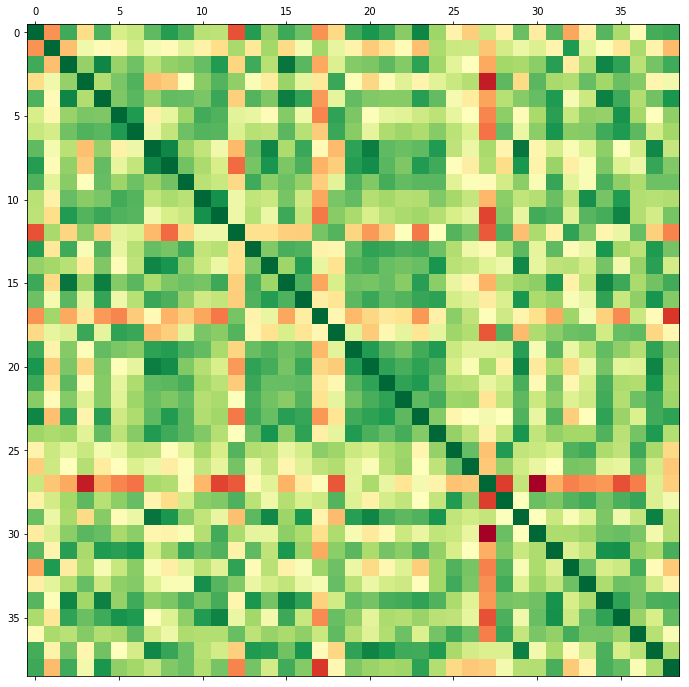

In [55]:
labels = [c[:2] for c in min_wage_corr.columns ]

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
ax.matshow(min_wage_corr, cmap = plt.cm.RdYlGn)